In [1]:
!pip install geocoder
!pip install folium

     |████████████████████████████████| 102kB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 102kB 12.3MB/s ta 0:00:01


In [2]:
# Import Libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
import geocoder
import folium
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage

from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup
print('Libraries imported.')

Libraries imported.


In [3]:
#https://geo.nyu.edu/catalog/nyu_2451_34572   Data source
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
neighborhoods_data = newyork_data['features']

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
print(" Above cell Executed")

 Above cell Executed


In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude


In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


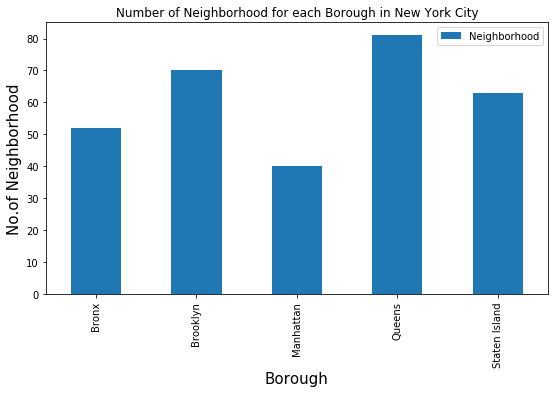

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9,5))
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [14]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [15]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [16]:
address = 'Newyork city, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitudeNY = location.latitude
longitudeNY = location.longitude
print('The geograpical coordinate of Newyork city are {}, {}.'.format(latitudeNY, longitudeNY))

The geograpical coordinate of Newyork city are 40.710318150000006, -74.00496837048613.


In [17]:
# Map of NY city
# create map of Bronx map (main part in newyork city)using latitude and longitude values
map_NY= folium.Map(location=[latitudeNY, longitudeNY], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'],neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
map_NY

In [18]:
address = 'Bronx, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Bronx are 40.85048545, -73.84040355802088.


In [19]:
# Map of Bronx
# create map of Bronx map (main part in newyork city)using latitude and longitude values
map_bronx = folium.Map(location=[latitude1, longitude1], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Borough'], bronx_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
map_bronx

In [20]:
CLIENT_ID = 'S3OP3YEIWWWQQDZ3E4PLCMPR3VKFIZT40M2ESM5OJ5FTZ2HC' # my Foursquare ID
CLIENT_SECRET = 'VJMMEMZENXPTVB400FRENMWSLWFKUYVEQKNFS5RT3JZGIX45' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: S3OP3YEIWWWQQDZ3E4PLCMPR3VKFIZT40M2ESM5OJ5FTZ2HC
CLIENT_SECRET: VJMMEMZENXPTVB400FRENMWSLWFKUYVEQKNFS5RT3JZGIX45


In [21]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
   longitude1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

<h2>Nearby Venues/Locations</h2>

In [22]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Residence Inn by Marriott New York The Bronx a...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",40.849917,-73.842152
1,LA Fitness,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",40.849739,-73.841949
2,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",40.851371,-73.844087
3,Skyline Bar & Lounge,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",40.852904,-73.842612
4,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",40.847132,-73.844449


<h2>Categories of Nearby Venues/Locations</h2>

In [25]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Residence Inn by Marriott New York The Bronx a...,Hotel,40.849917,-73.842152
1,LA Fitness,Gym,40.849739,-73.841949
2,Starbucks,Coffee Shop,40.851371,-73.844087
3,Skyline Bar & Lounge,Lounge,40.852904,-73.842612
4,Starbucks,Coffee Shop,40.847132,-73.844449


In [26]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Donut Shop             2
Food Court             2
Coffee Shop            2
Rental Car Location    2
Gym                    2
Sandwich Place         2
Medical Center         1
Buffet                 1
Supermarket            1
American Restaurant    1
Name: categories, dtype: int64

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [29]:
print('There are {} Uniques Categories.'.format(len(bronx_venues['Venue Category'].unique())))
bronx_venues.groupby('Neighborhood').count().head()

There are 208 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,38,38,38,38,38,38
Baychester,46,46,46,46,46,46
Bedford Park,51,51,51,51,51,51
Belmont,86,86,86,86,86,86
Bronxdale,69,69,69,69,69,69


<h2>One Hot Encoding of Features</h2>

In [30]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_onehot.head(5)

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
num_top_venues = 5
for hood in bronx_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Allerton ----
                  venue  freq
0            Donut Shop  0.11
1           Pizza Place  0.08
2   Martial Arts School  0.05
3              Pharmacy  0.05
4  Fast Food Restaurant  0.05


---- Baychester ----
              venue  freq
0       Bus Station  0.09
1  Department Store  0.07
2        Donut Shop  0.07
3       Supermarket  0.04
4     Women's Store  0.04


---- Bedford Park ----
                venue  freq
0         Pizza Place  0.08
1               Diner  0.08
2       Deli / Bodega  0.06
3      Sandwich Place  0.06
4  Mexican Restaurant  0.06


---- Belmont ----
                venue  freq
0  Italian Restaurant  0.17
1         Pizza Place  0.09
2              Bakery  0.06
3       Deli / Bodega  0.06
4         Coffee Shop  0.03


---- Bronxdale ----
                venue  freq
0         Pizza Place  0.10
1  Italian Restaurant  0.06
2      Sandwich Place  0.04
3                Bank  0.04
4         Coffee Shop  0.03


---- Castle Hill ----
                venue  freq

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<h2>Most Common venues near neighborhood<h2>

In [33]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Donut Shop,Pizza Place,Sandwich Place,Bar,Martial Arts School,Fast Food Restaurant,Pharmacy,Supermarket,Chinese Restaurant,Caribbean Restaurant
1,Baychester,Bus Station,Department Store,Donut Shop,Supermarket,Discount Store,Furniture / Home Store,Women's Store,Pet Store,Park,Paper / Office Supplies Store
2,Bedford Park,Pizza Place,Diner,Sandwich Place,Deli / Bodega,Grocery Store,Mexican Restaurant,Pharmacy,Spanish Restaurant,Chinese Restaurant,Donut Shop
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Coffee Shop,Dessert Shop,Plaza,Mexican Restaurant,Café,Spanish Restaurant
4,Bronxdale,Pizza Place,Italian Restaurant,Sandwich Place,Bank,Coffee Shop,Pharmacy,Mobile Phone Shop,Donut Shop,Diner,Ice Cream Shop


<h2>K-means clustering</h2>

In [34]:
# Using K-Means- cluster the neighborhood into 3 clusters
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(bronx_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged =bronx_data.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head()# check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0,Pharmacy,Gas Station,Ice Cream Shop,Sandwich Place,Supermarket,Fried Chicken Joint,Donut Shop,Bakery,Caribbean Restaurant,Fast Food Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,0,Accessories Store,Bus Station,Fast Food Restaurant,Laundromat,Sandwich Place,Restaurant,Print Shop,Post Office,Pizza Place,Pharmacy
2,Bronx,Eastchester,40.887556,-73.827806,0,Caribbean Restaurant,Fast Food Restaurant,Diner,Cosmetics Shop,Bakery,Food & Drink Shop,Music Venue,Sandwich Place,Donut Shop,Nightclub
3,Bronx,Fieldston,40.895437,-73.905643,2,Plaza,Electronics Store,Art Gallery,River,Bus Station,Park,Zoo,Doctor's Office,Fast Food Restaurant,Farmers Market
4,Bronx,Riverdale,40.890834,-73.912585,0,Bank,Japanese Restaurant,Bagel Shop,Park,Mexican Restaurant,Pizza Place,Café,Medical Supply Store,Donut Shop,Restaurant


<h2>Mapping the Clusters</h2>

In [36]:
kclusters = 10

In [37]:
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(bronx_merged['Latitude'], 
                                   bronx_merged['Longitude'], 
                                   bronx_merged['Neighborhood'], 
                                   bronx_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [38]:
df1=bronx_merged.loc[bronx_merged['Cluster Labels'] == 0,bronx_merged.columns[[2] + list(range(5, bronx_merged.shape[1]))]]
df2=bronx_merged.loc[bronx_merged['Cluster Labels'] == 1,bronx_merged.columns[[2] + list(range(5, bronx_merged.shape[1]))]]
df3=bronx_merged.loc[bronx_merged['Cluster Labels'] == 2,bronx_merged.columns[[2] + list(range(5, bronx_merged.shape[1]))]]

In [39]:
bronx_Avg_HousingPrice=pd.DataFrame({"Neighborhood":bronx_data["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,335000.0,325900.0,419400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,479200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,365000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,329200.0,
                                                               329200.0,365000.0,388500.,385400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,379200.0,379200.0,375000.0,370500.0,355400.0,493500.0,433500.0,335000.0
                                                                ]})

In [40]:
bronx_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

In [41]:
bronx_Avg_HousingPrice.head()

,Average_Housing_Price
Neighborhood,
Wakefield,335000.0
Co-op City,286600.0
Eastchester,335000.0
Fieldston,325900.0
Riverdale,419400.0


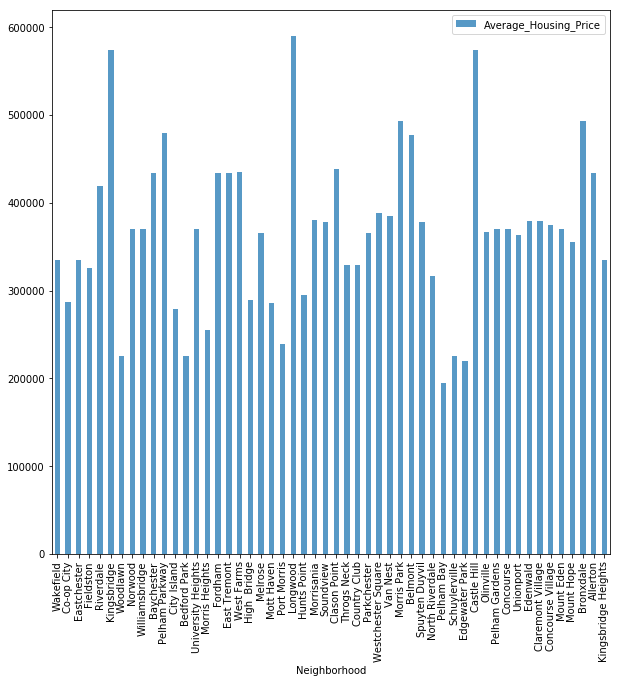

In [42]:
%matplotlib inline
bronx_Avg_HousingPrice.plot(kind='bar',figsize=(10,10),alpha=0.75)

<h2>School Rating Clusters</h2>

In [43]:
new_bro=bronx_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
bronx_school_ratings=pd.DataFrame({"Neighborhood":bronx_data["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,5,2,5,2,7,2,3,2,6,
                                                           5,5,8,9,9,6,6,4,5,4,6,8,10,8,9,6,6,
                                                           10,6,5,8,9,6,6,10,8,9,5,6,8,5,6,6,9,8
                                                           ]})

In [44]:
bronx_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

In [46]:
bronx_school_ratings.head()

,Top School Rating
Neighborhood,
Wakefield,7
Co-op City,9
Eastchester,5
Fieldston,8
Riverdale,10


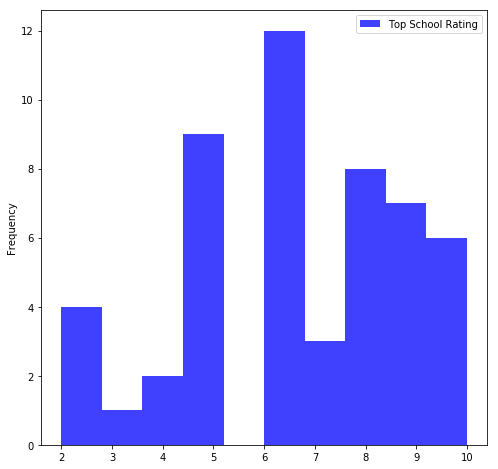

In [47]:
bronx_school_ratings.plot(kind='hist',figsize=(8,8),color='blue',alpha=0.75);